# Linear Regression &  Multi-Linear Regression

## Objective:
    To predict the expenses of Insurance based on 2 independent variable i.e. Age & bmi using linear regression

## About Data :
    age: Age of the insured person (numeric).
    sex: Gender of the insured person (categorical: male or female).
    bmi: Body Mass Index (BMI) of the insured person, which is a measure of body fat based on height and weight (numeric).
    children: Number of children/dependents covered by the insurance plan (numeric).
    smoker: Whether the insured person is a smoker or non-smoker (categorical: yes or no).
    region: Region where the insured person resides (categorical: e.g., northeast, southeast, southwest, northwest).
    expenses: Insurance expenses (premiums) incurred by the insured person (numeric), which could represent the target variable for prediction or analysis.

In [ ]:
# importing initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/insurance.csv')

## Reading the file and tabular analysis

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

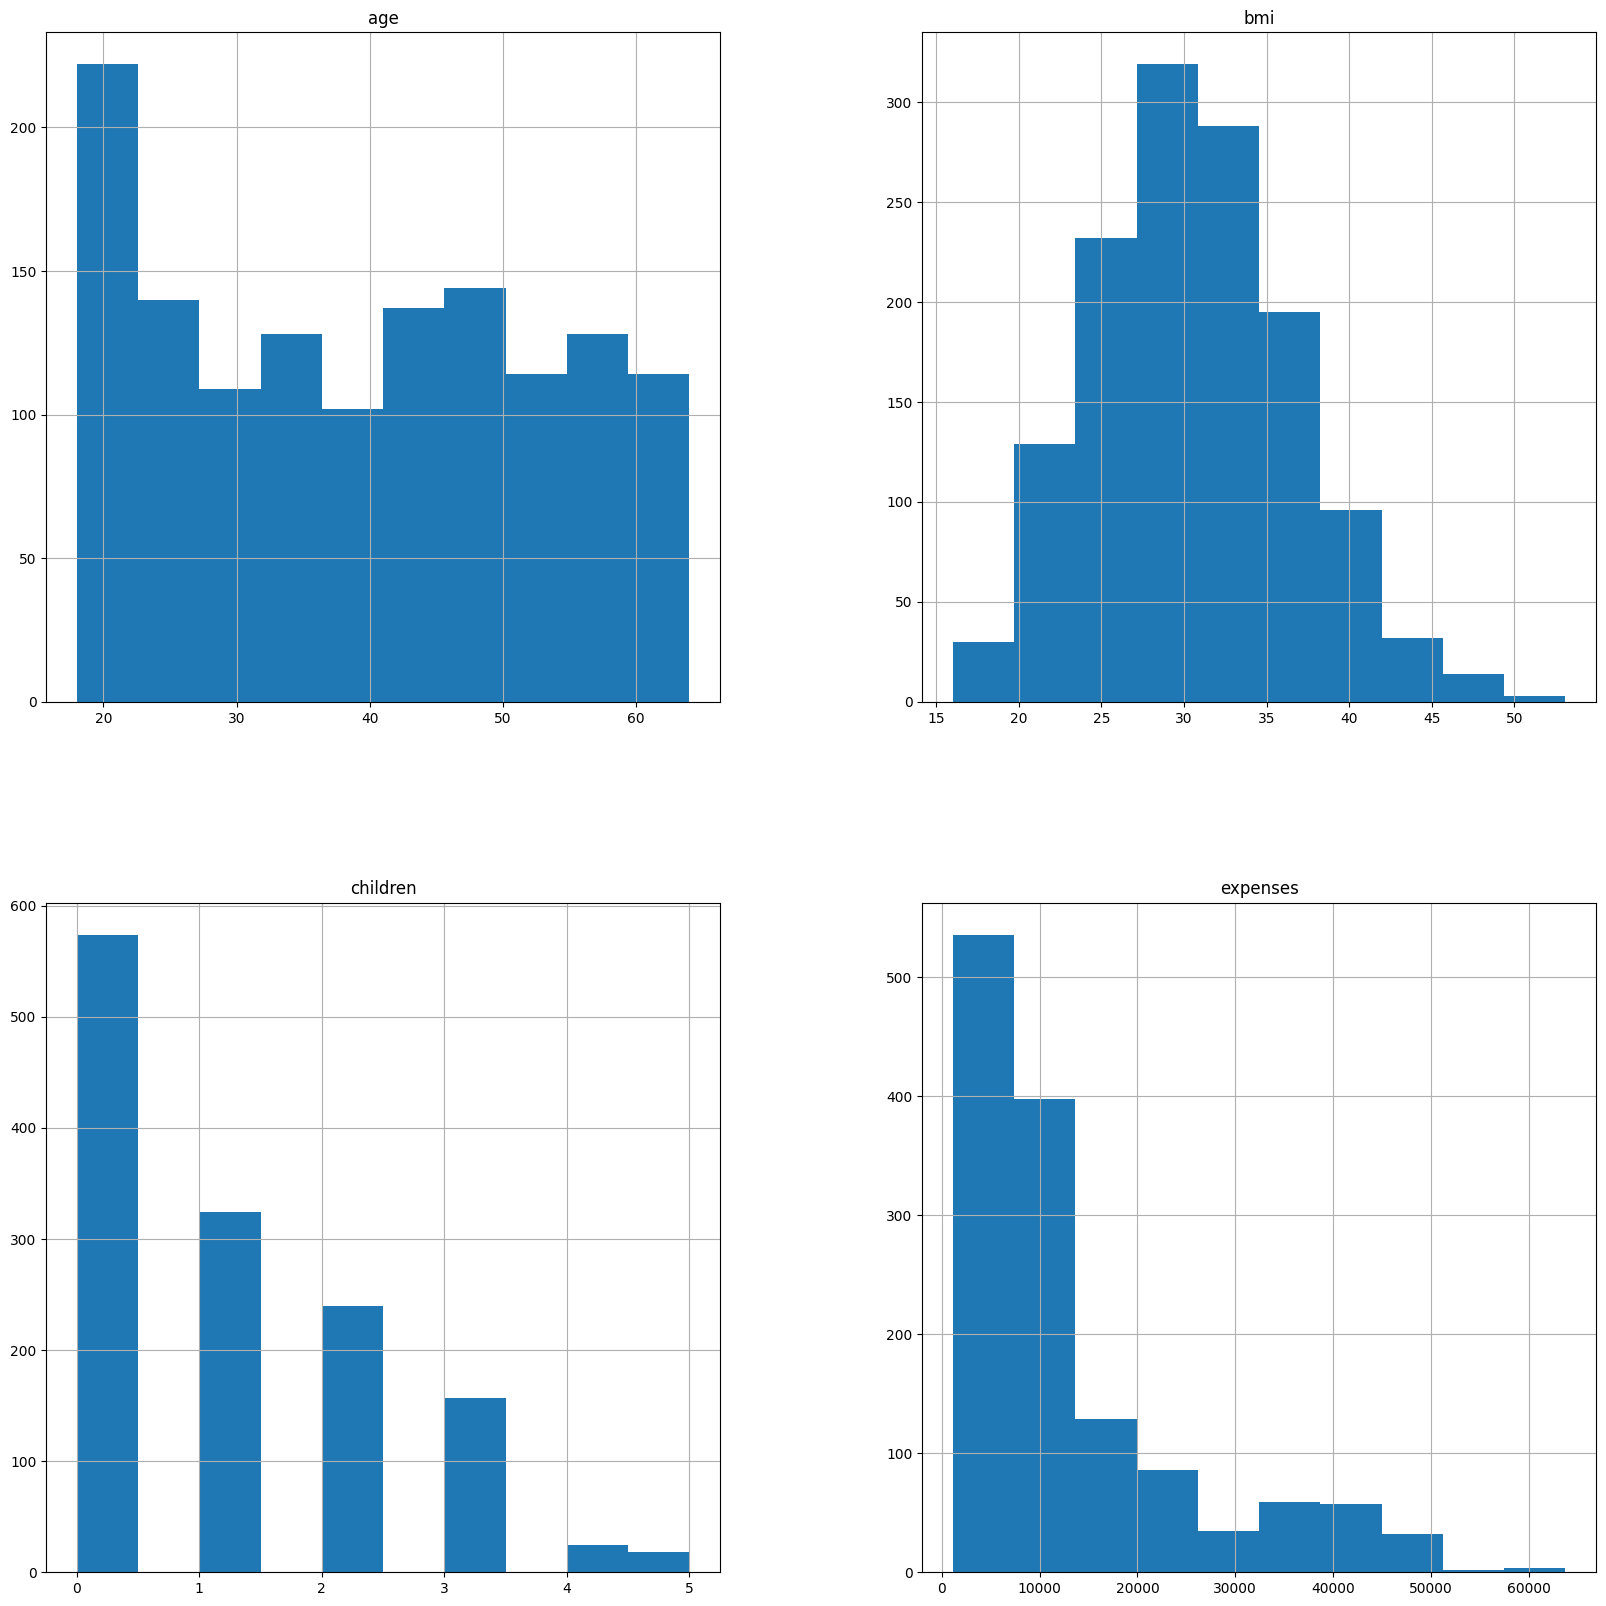

In [ ]:
df.hist(figsize = (20,20))

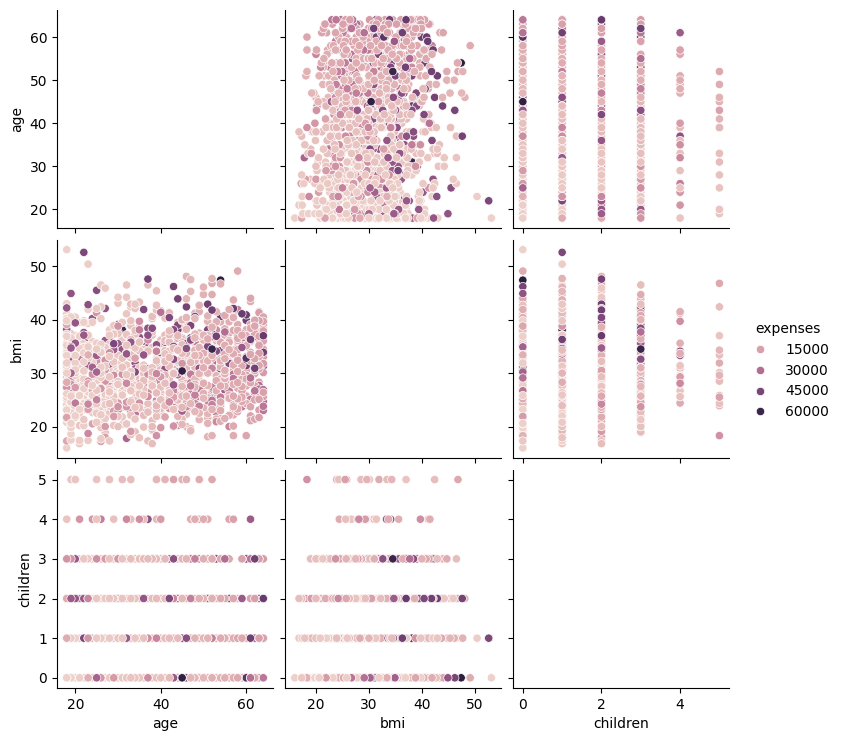

In [ ]:
sn.pairplot(df, hue = 'expenses')

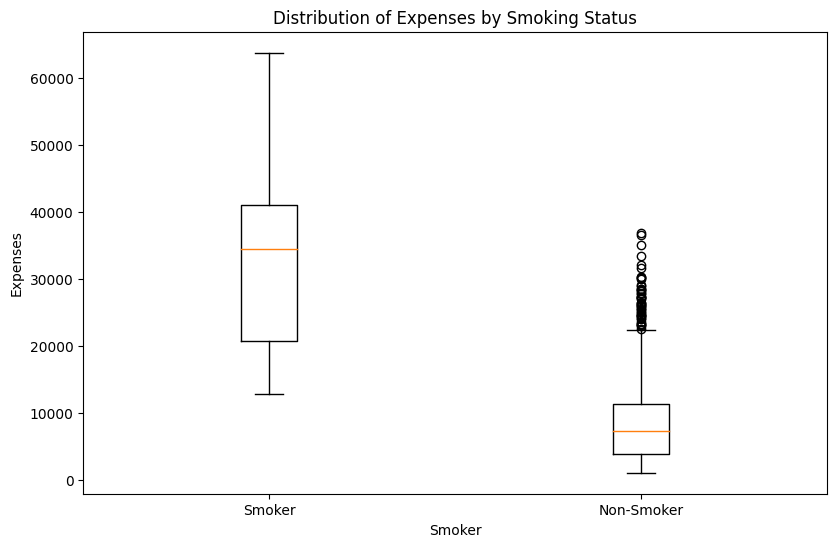

In [ ]:
# Create the boxplots
plt.figure(figsize=(9.6, 6))
plt.boxplot([df[df['smoker'] == 'yes']['expenses'], df[df['smoker'] == 'no']['expenses']], labels=['Smoker', 'Non-Smoker'])

# Set the title and labels
plt.title('Distribution of Expenses by Smoking Status')
plt.xlabel('Smoker')
_ = plt.ylabel('Expenses')

<Axes: >

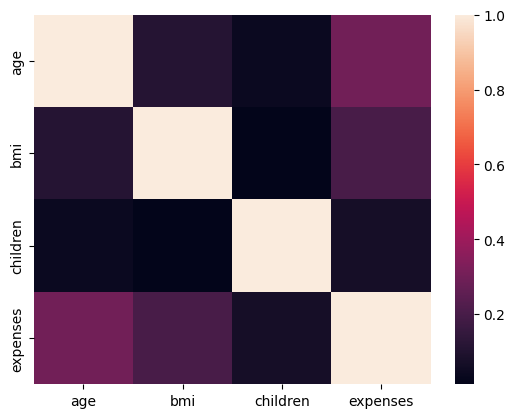

In [ ]:
sn.heatmap(df.corr(numeric_only=True))

## Data cleaning

In [ ]:
df.drop(['sex','children','smoker','region'],axis=1)

,age,bmi,expenses
0,19,27.9,16884.92
1,18,33.8,1725.55
2,28,33.0,4449.46
3,33,22.7,21984.47
4,32,28.9,3866.86
...,...,...,...
1333,50,31.0,10600.55
1334,18,31.9,2205.98
1335,18,36.9,1629.83
1336,21,25.8,2007.95


## Decide 'What is X?' & 'What is Y?'

In [ ]:
x1 = df[['age']]
x2 = df[['bmi']]
x = df[['age','bmi']]
y = df.expenses

## Linear Regression X1

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x1_train, x1_test, y_train, y_test =train_test_split(x1,y,test_size=0.3)

In [ ]:
x1_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 3 to 1078
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     936 non-null    int64
dtypes: int64(1)
memory usage: 14.6 KB


In [ ]:
x1_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 1125 to 660
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     402 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


### Model traning testing and Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(x1_train, y_train)

# Make predictions
y_pred = model.predict(x1_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Print out the coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Coefficient: 251.52410250259447
Intercept: 3168.427968129463
Mean Squared Error: 152014372.86412913
R-squared: 0.08773689474126056


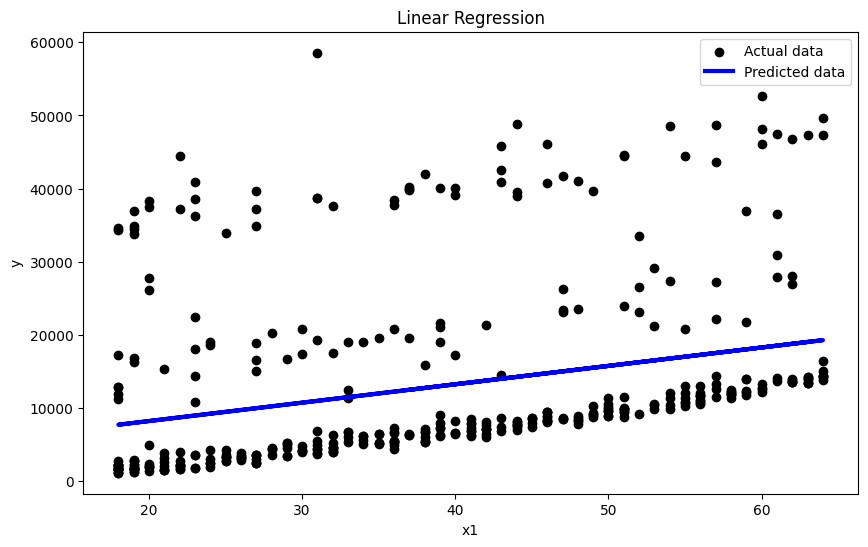

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x1_test, y_test, color='black', label='Actual data')
plt.plot(x1_test, y_pred, color='blue', linewidth=3, label='Predicted data')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Linear Regression X2

### Train Test Split

In [ ]:
x2_train, x2_test, y_train, y_test =train_test_split(x2,y,test_size=0.3)

In [ ]:
x2_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 955 to 1036
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     936 non-null    float64
dtypes: float64(1)
memory usage: 14.6 KB


In [ ]:
x2_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 876 to 366
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     402 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB


### Model Training Testing & Evaluation

In [ ]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(x2_train, y_train)

# Make predictions
y_pred = model.predict(x2_test)

In [ ]:
# Print out the coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Coefficient: 377.5361425671699
Intercept: 1633.7251430439119
Mean Squared Error: 140805854.42986825
R-squared: 0.04380606781186791


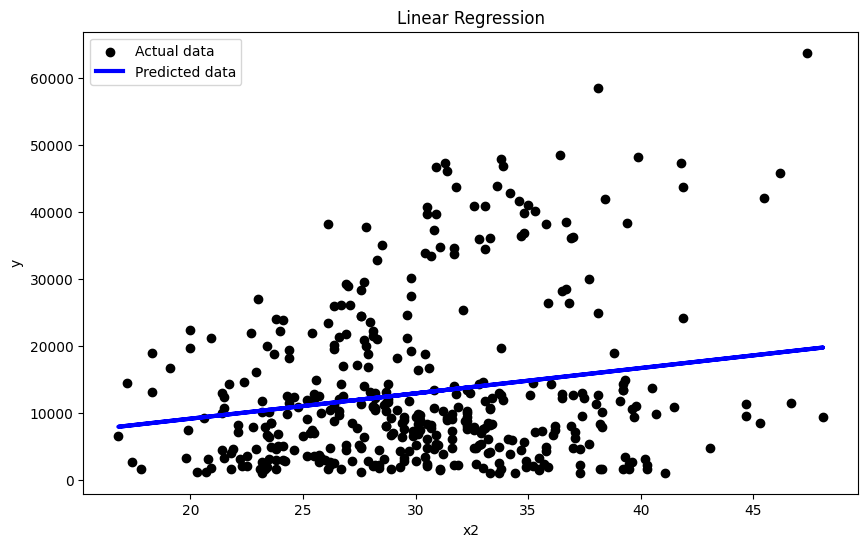

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x2_test, y_test, color='black', label='Actual data')
plt.plot(x2_test, y_pred, color='blue', linewidth=3, label='Predicted data')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Multi-Linear Regrssion X1 & X2 as X

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 332 to 1126
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     936 non-null    int64  
 1   bmi     936 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 21.9 KB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 764 to 1295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     402 non-null    int64  
 1   bmi     402 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.4 KB


### Training Testing & Evaluation

In [ ]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

In [ ]:
# Print out the coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Coefficient: 232.49714246397895
Intercept: -5943.514740306808
Mean Squared Error: 127341298.32570921
R-squared: 0.1315130541102314


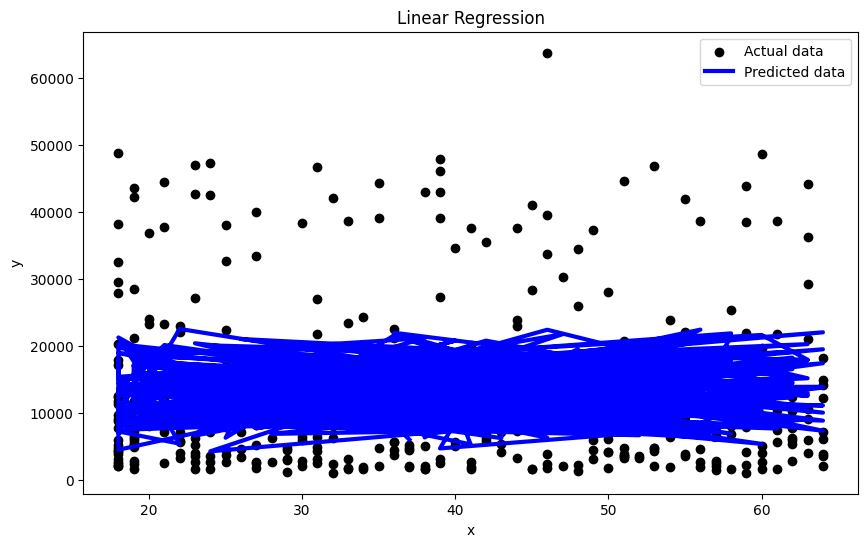

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x1_test, y_test, color='black', label='Actual data')
plt.plot(x1_test, y_pred, color='blue', linewidth=3, label='Predicted data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


## Conclusion:
    We can use this Model for predicting 'expenses' by using 'age' and 'bmi'